<a href="https://colab.research.google.com/github/Manoharjha333/transport-demand-prediction/blob/main/ML_Regression_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction






##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

#Description of the Transport Data

This is a dataset prepared on the demand of transport which has more than 50000 data in which we have to predict how many seats MobiTicket can sell in each ride. This dataset contains 14 different routes going to the same location Nairobi with different timings and routes.

The journey from these 14 origin points to the first stop on the outskirts of Nairobi takes approximately 8 to 9 hours from the time of departure. From the first stop on the outskirts of Nairobi to the main bus terminal, where most passengers disembark, in the Central Business District, it takes 2 to 3 hours, depending on traffic. The three stops each of these routes make in Nairobi (in order) are:
1. Kawangware: First stop on the outskirts of Nairobi
2. Westlands
3. Afya Centre: The main bus terminal where most passengers disembark

Passengers on these bus (or shuttle) rides are not only affected by Nairobi traffic during their journey in the city, but from there they must continue their journey to their final destination in Nairobi, wherever that may be. The traffic may act as a deterrent for those who have the option to avoid buses arriving in Nairobi during peak traffic hours. On the other hand, traffic can be an indication of people's movement patterns, reflecting business hours, cultural events, political events, and holidays.


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Manoharjha333/transport-demand-prediction/blob/768e7858b4a3e6ae9a00e1ed251e72226f0489e1/ML_Submission_Template.ipynb



# **Problem Statement**


#Problem Statement
This transport data departs from 14 origin points to the first stop on the outskirts of Nairobi, taking approximately 8 to 9 hours. It contains data of more than 50000. In which we have to estimate how many seats MobiTicket can sell in each ride.
It consists of 14 different routes leading to the same location Nairobi with different timings and routes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [96]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
sns.set_style('darkgrid')
import missingno as msno
import datetime

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [97]:
# Load Dataset
dataset = pd.read_csv(r"/content/drive/MyDrive/Transport Demand Predction/train_revised.csv")

### Dataset First View

In [98]:
# Dataset First Look
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [99]:
# Dataset Rows & Columns count
dataset.shape

(51645, 10)

### Dataset Information

In [100]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [101]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [102]:
# Missing Values/Null Values Count
dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

<Axes: >

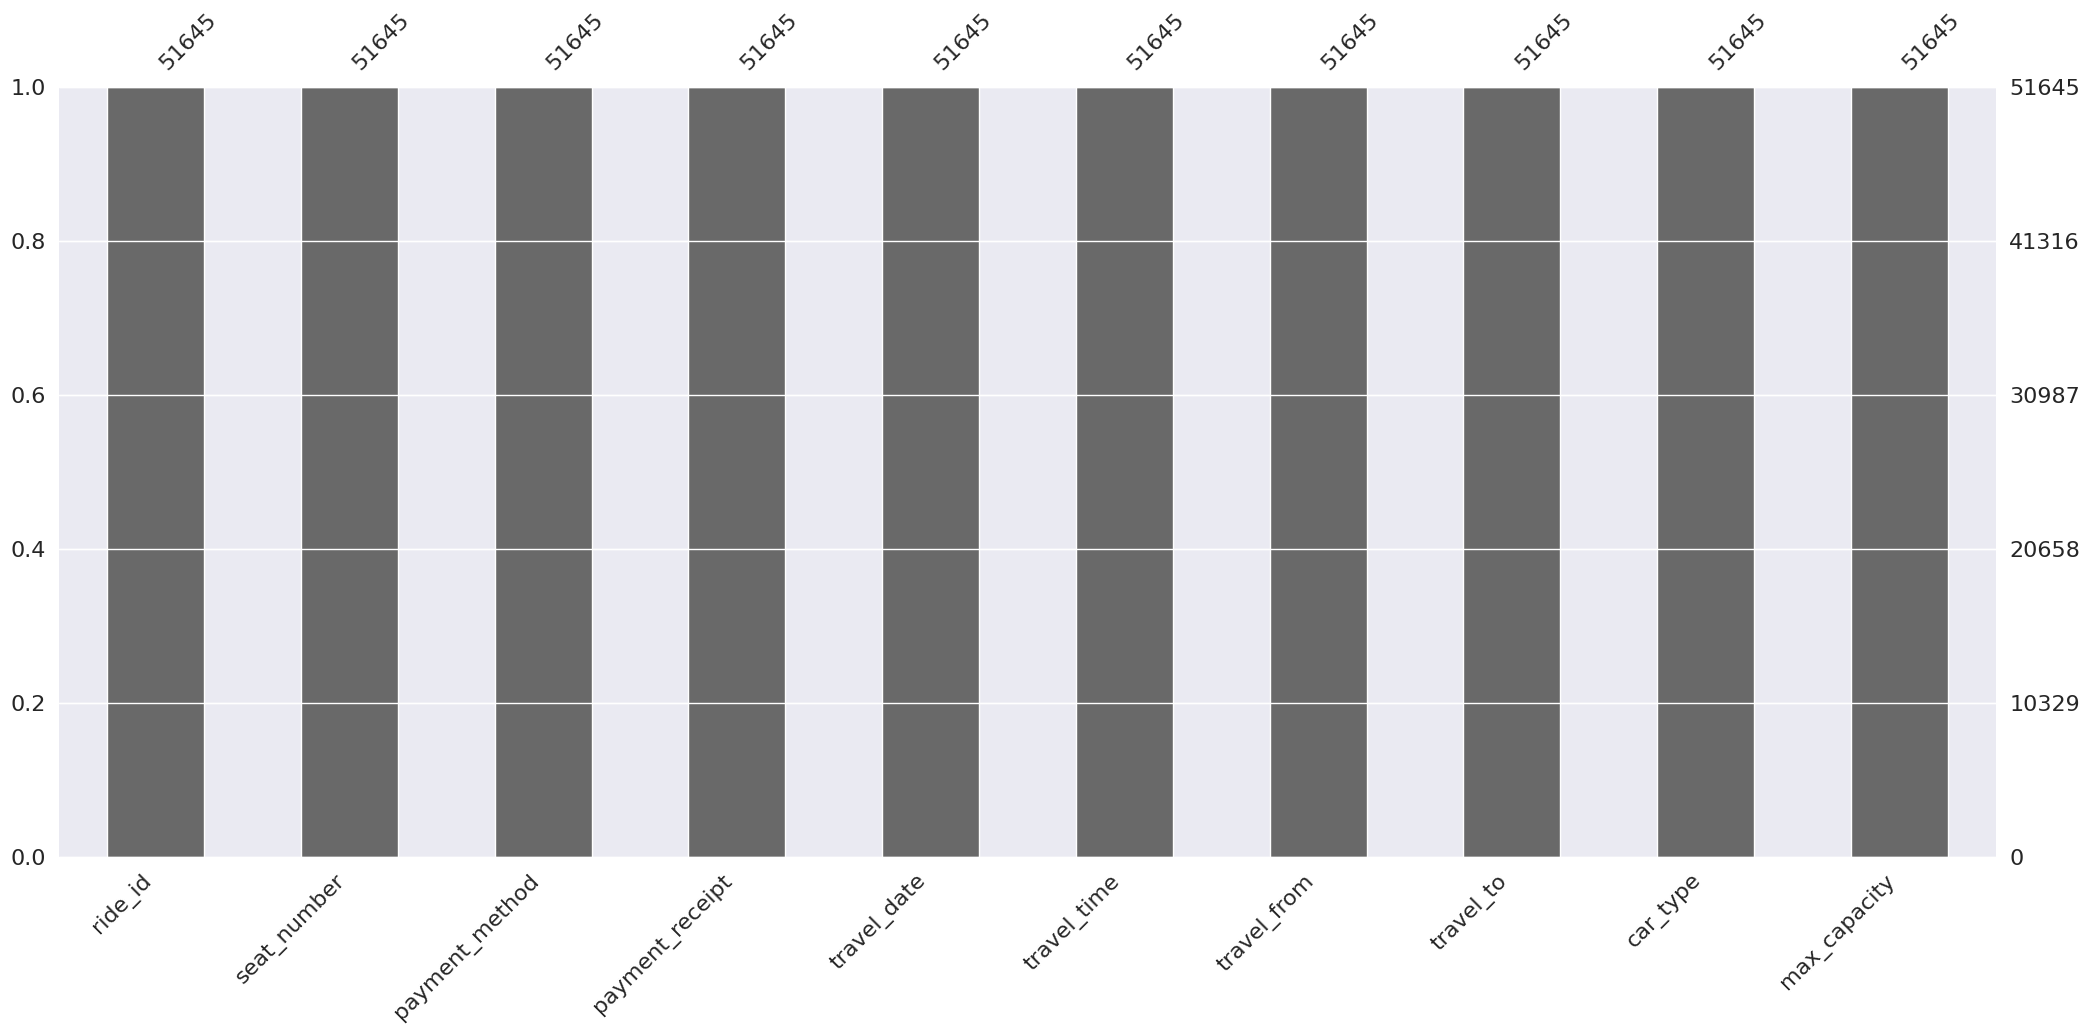

In [103]:
# Visualizing the missing values
msno.bar(dataset)

### What did you know about your dataset?

**Answer Here**

This dataset is a dataset of demand for a transport which has 51645 rows and 10 columns. In which there is no duplicate value nor any missing value.

## ***2. Understanding Your Variables***

In [104]:
# Dataset Columns
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [105]:
# Dataset Describe
dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


### Variables Description

**Answer Here**

ride_id: unique ID of a vehicle on a specific route on a specific day and time

seat number: seat assigned to ticket

payment method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel from: town from which ride originated

travel to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)


max_capacity: number of seats on the vehicle


### Check Unique Values for each variable.

In [106]:
# Check Unique Values for each variable.
dataset.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [107]:
# Write your code to make your dataset analysis ready.

# Drop  columns that are not needed for analysis
dataset.drop(['payment_receipt'], axis=1, inplace=True)

In [108]:
# find which value is the most frequent in a row
dataset['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [109]:
# find which value is the most frequent in a row
dataset['travel_time'].value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
         ... 
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [110]:
dataset['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [111]:
dataset['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [112]:
dataset['max_capacity'].value_counts()

49    31985
11    19660
Name: max_capacity, dtype: int64

In [113]:
# Date and Time Handling
# Convert a date column to a datetime object
dataset['travel_date'] = pd.to_datetime(dataset['travel_date'])

# Extract year, month, and day from a datetime column
dataset['year'] = dataset['travel_date'].dt.year
dataset['month'] = dataset['travel_date'].dt.month
dataset['day'] = dataset['travel_date'].dt.day

In [114]:
dataset['travel_time'] = pd.to_datetime(dataset['travel_time'])

In [115]:
# Calculation of Target varible based on the ride id
number_of_ticket = dataset.groupby('ride_id')['seat_number'].count().rename("Max Time Seat").reset_index()
number_of_ticket

,ride_id,Max Time Seat
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [116]:
# Merging the calculated target variable column to the dataset based on the ride_id
dataset = dataset.merge(number_of_ticket, how= 'left', on='ride_id')
dataset

,ride_id,seat_number,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,Max Time Seat
0,1442,15A,Mpesa,2017-10-17,2023-11-02 07:15:00,Migori,Nairobi,Bus,49,2017,10,17,1
1,5437,14A,Mpesa,2017-11-19,2023-11-02 07:12:00,Migori,Nairobi,Bus,49,2017,11,19,1
2,5710,8B,Mpesa,2017-11-26,2023-11-02 07:05:00,Keroka,Nairobi,Bus,49,2017,11,26,1
3,5777,19A,Mpesa,2017-11-27,2023-11-02 07:10:00,Homa Bay,Nairobi,Bus,49,2017,11,27,5
4,5778,11A,Mpesa,2017-11-27,2023-11-02 07:12:00,Migori,Nairobi,Bus,49,2017,11,27,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,2018-04-20,2023-11-02 08:00:00,Awendo,Nairobi,Bus,49,2018,4,20,1
51641,13809,18A,Mpesa,2018-04-20,2023-11-02 08:00:00,Migori,Nairobi,Bus,49,2018,4,20,29
51642,13809,17A,Mpesa,2018-04-20,2023-11-02 08:00:00,Migori,Nairobi,Bus,49,2018,4,20,29
51643,13796,16B,Mpesa,2018-04-20,2023-11-02 07:08:00,Awendo,Nairobi,Bus,49,2018,4,20,27


In [117]:
# find which value is the most frequent in a row
dataset['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

In [118]:
# Drop  columns that are not needed for analysis
dataset.drop(['travel_date'], axis=1, inplace=True)


In [119]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### What all manipulations have you done and insights you found?

**Answer Here.**

In the Dataset, I first removed the column that I did not need to do anything special in the dataset, so I counted many columns of columns, so that I came to know that In which value the most numbers are being counted in which value, Differently separated the date, time and year. Also set a group by group by setting a target variable. Then merged the group by data. And then the value of Ride_id was counted to know how often a ride ID has been traveling with a ride ID

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

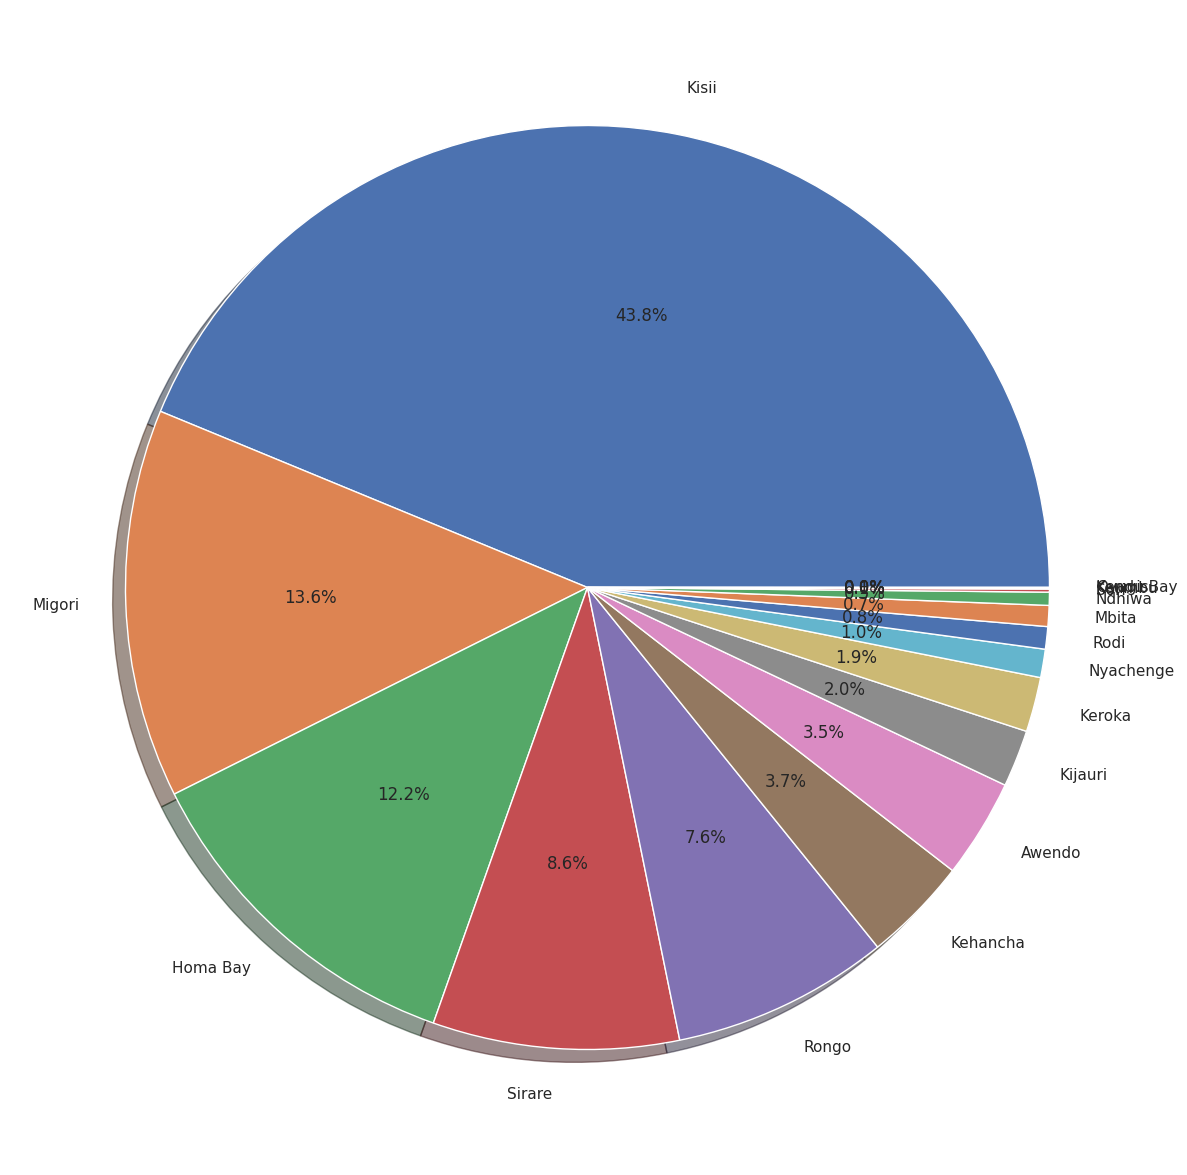

In [120]:
# Chart - 1 visualization code
chart1= dataset['travel_from'].value_counts()
fig, ax = plt.subplots(figsize =(25, 15))
ax.pie(chart1, labels = dataset['travel_from'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I had to know from where people are traveling the most, what is the ratio.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

I came to know that most people do Kissi, Migori and Homa Bay and people travel less from the remaining place.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

If we go to the recommendations of Insights so that from where most people are traveling, there is a need to focus more on more business and at the same time we can think about business growth at where people are traveling less.

#### Chart - 2

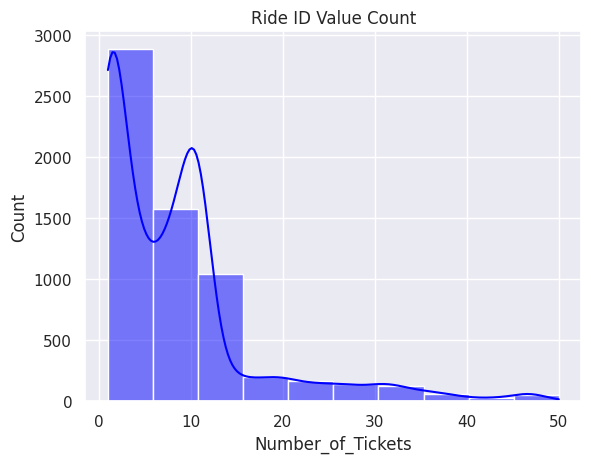

In [121]:
# Chart - 2 visualization code

# Create a histogram using sns.histplot
ride_ID = sns.histplot(dataset['ride_id'].value_counts(), bins=10, kde=True, color='blue')

# Add labels and a title
plt.xlabel('Number_of_Tickets')
plt.ylabel('Count')
plt.title('Ride ID Value Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know how many times people are traveling with an ID

##### 2. What is/are the insight(s) found from the chart?

Answer Here

People have traveled maximum 50 times with an ID

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows us that our customers are traveling with us many times and if we want, we can take out an offer for it so that he will be connected with us for travel.

#### Chart - 3

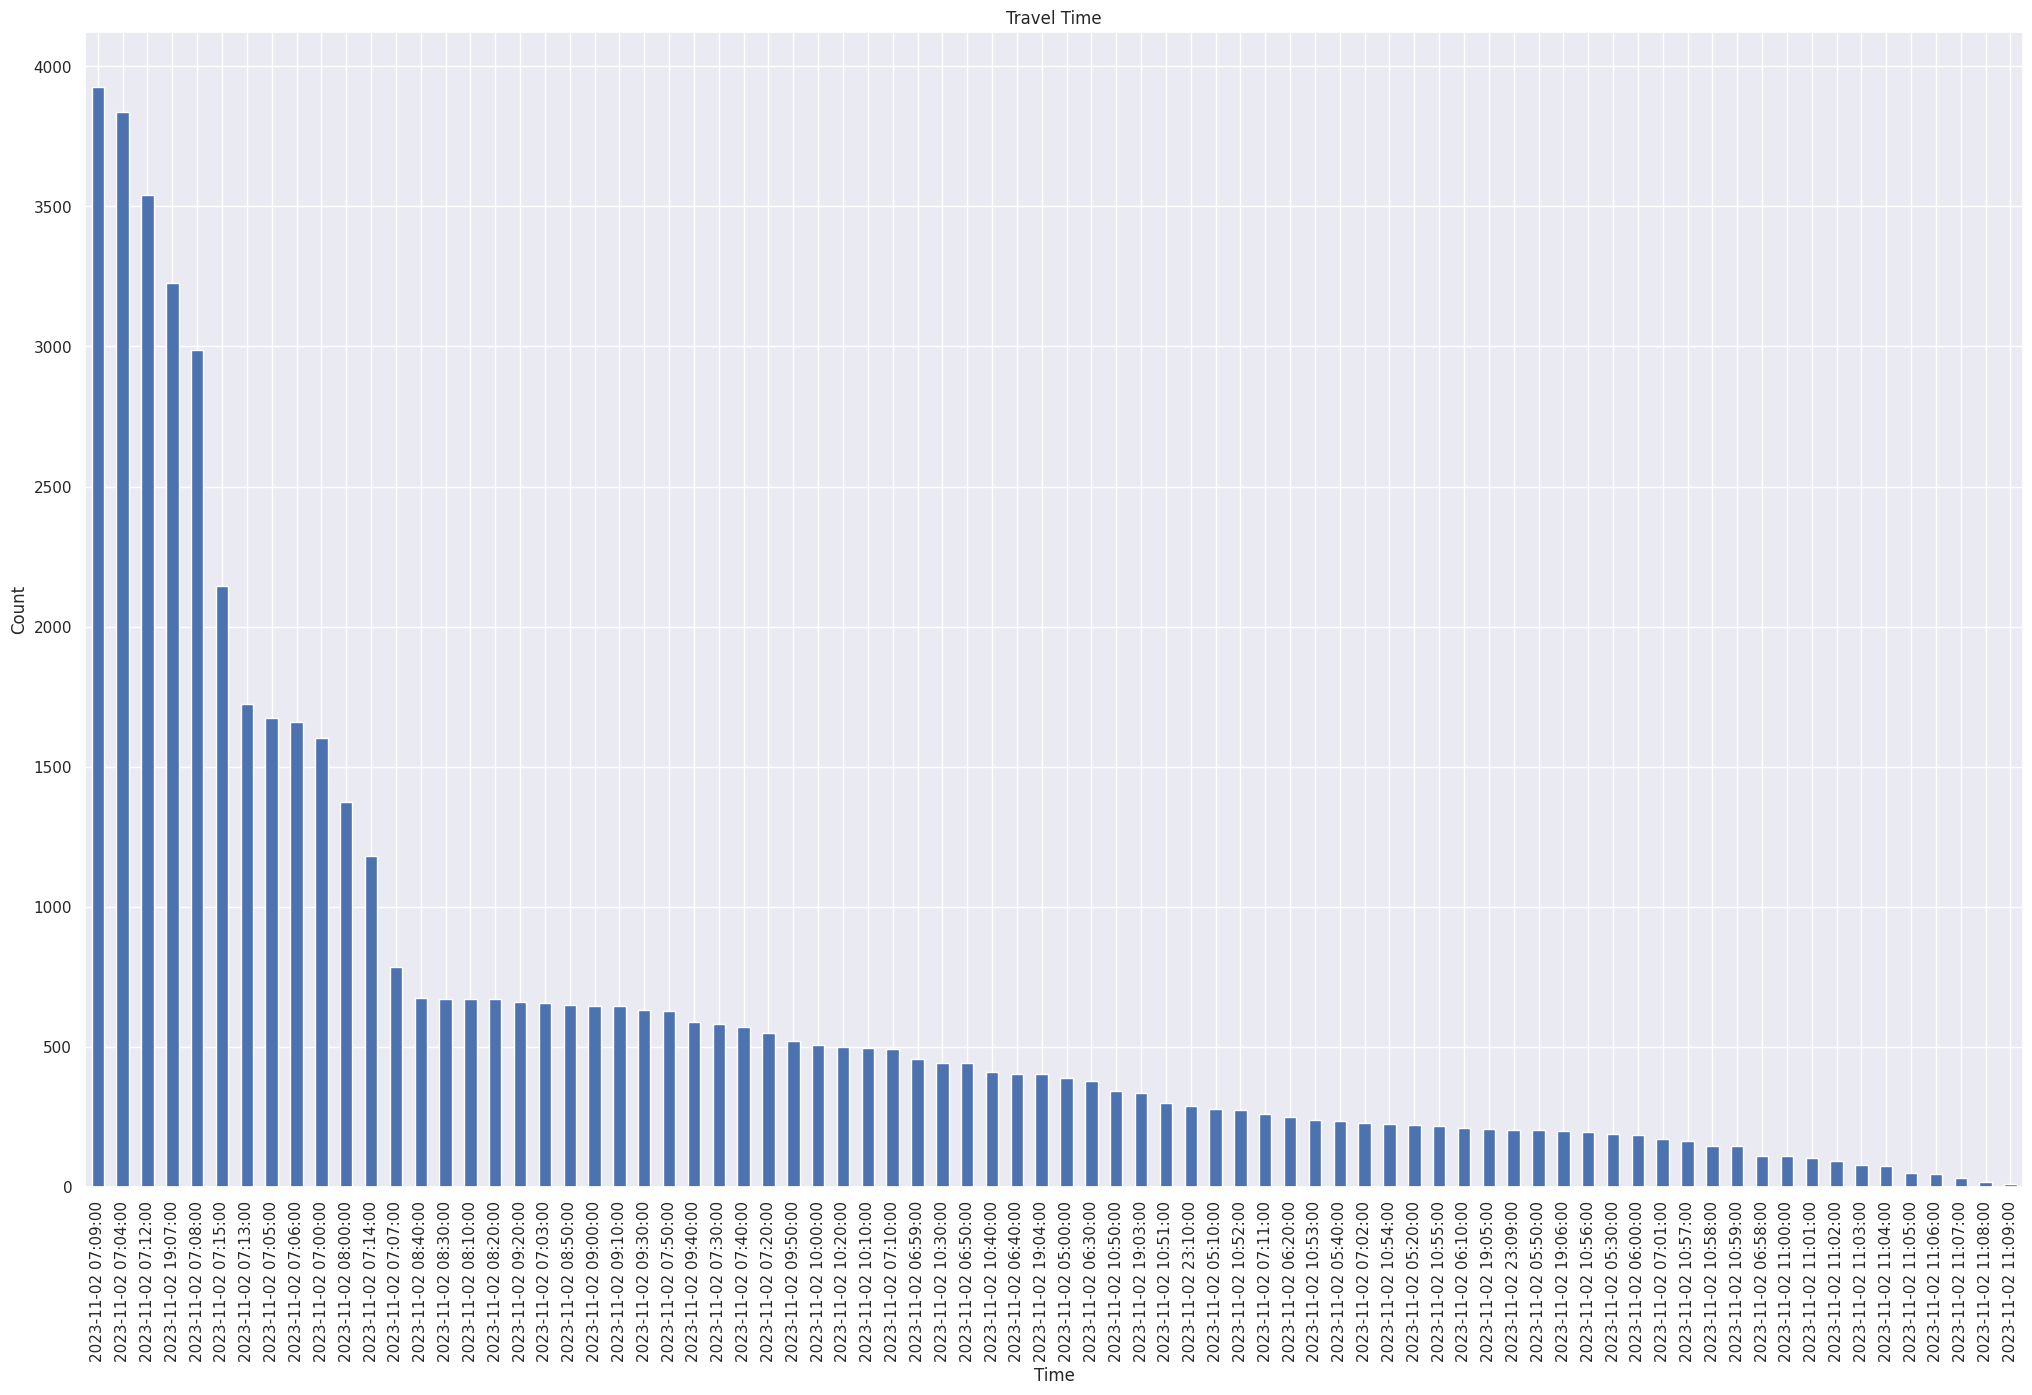

In [122]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize =(25, 15))
dataset['travel_time'].value_counts().plot(kind='bar')

# Add labels and a title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Travel Time')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I had to know what time people travel the most

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this I came to know that people travel the most from 7 to 7:09  and people travel work during the rest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows us how we can take advantage of the crowd

#### Chart - 4

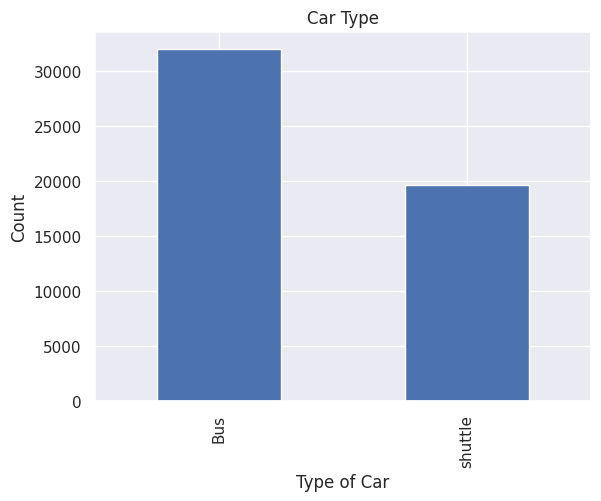

In [123]:
# Chart - 4 visualization code

dataset['car_type'].value_counts().plot(kind='bar')

# Add labels and a title
plt.xlabel('Type of Car')
plt.ylabel('Count')
plt.title('Car Type')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I had to know which type of car people preffer more for travel.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the people use bus than shuttle for travel

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

We can focus more on the bus by traveling more people in the bus

#### Chart - 5

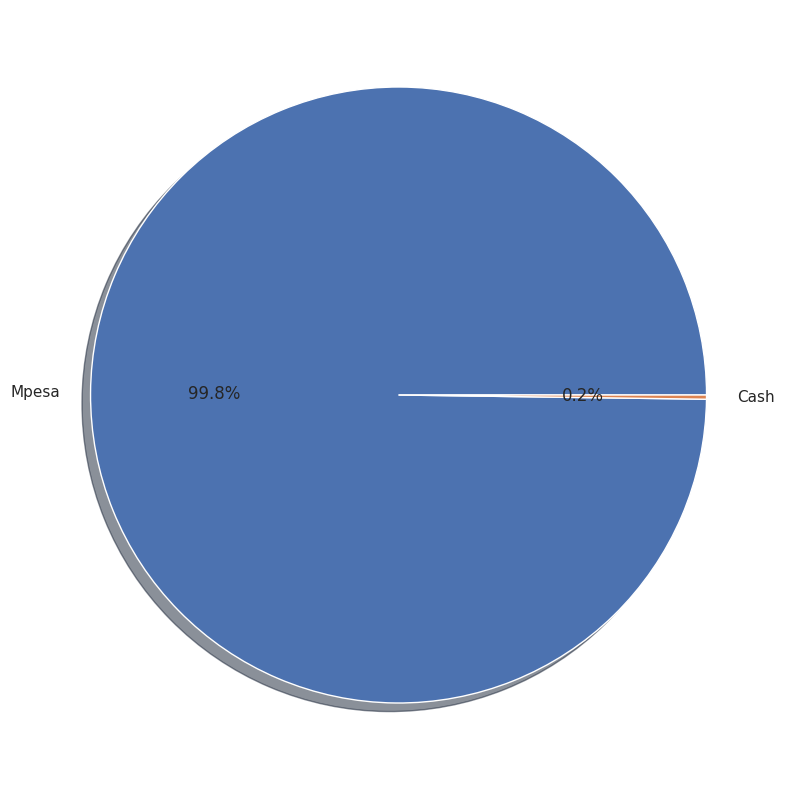

In [124]:
# Chart - 5 visualization code

chart1= dataset['payment_method'].value_counts()
fig, ax = plt.subplots(figsize =(15, 10))
ax.pie(chart1, labels = dataset['payment_method'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I had to know which mode people are using more for payment

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This made me know that 99.8 % people are using Mpesa for payment and the number of cash users is 0.2 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There is no obstruction in our payment mode. Can focus on it

#### Chart - 6

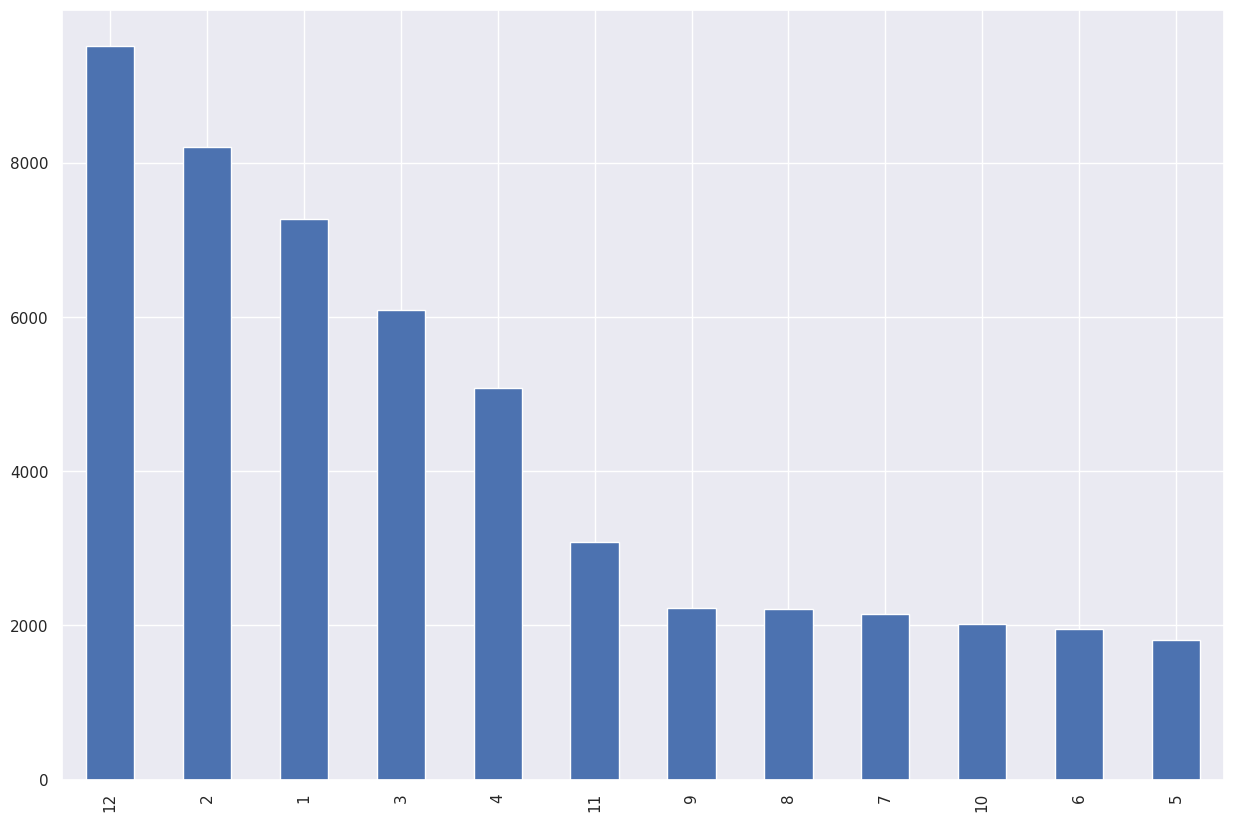

In [125]:
# Chart - 6 visualization code
fig, ax = plt.subplots(figsize =(15, 10))
month_bar = dataset['month'].value_counts().plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I wanted to know in which month people are traveling more

##### 2. What is/are the insight(s) found from the chart?

Answer Here

People are traveling the most in the twelfth month of the year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

With this, you can focus on how to engage customer in this month.

#### Chart - 7

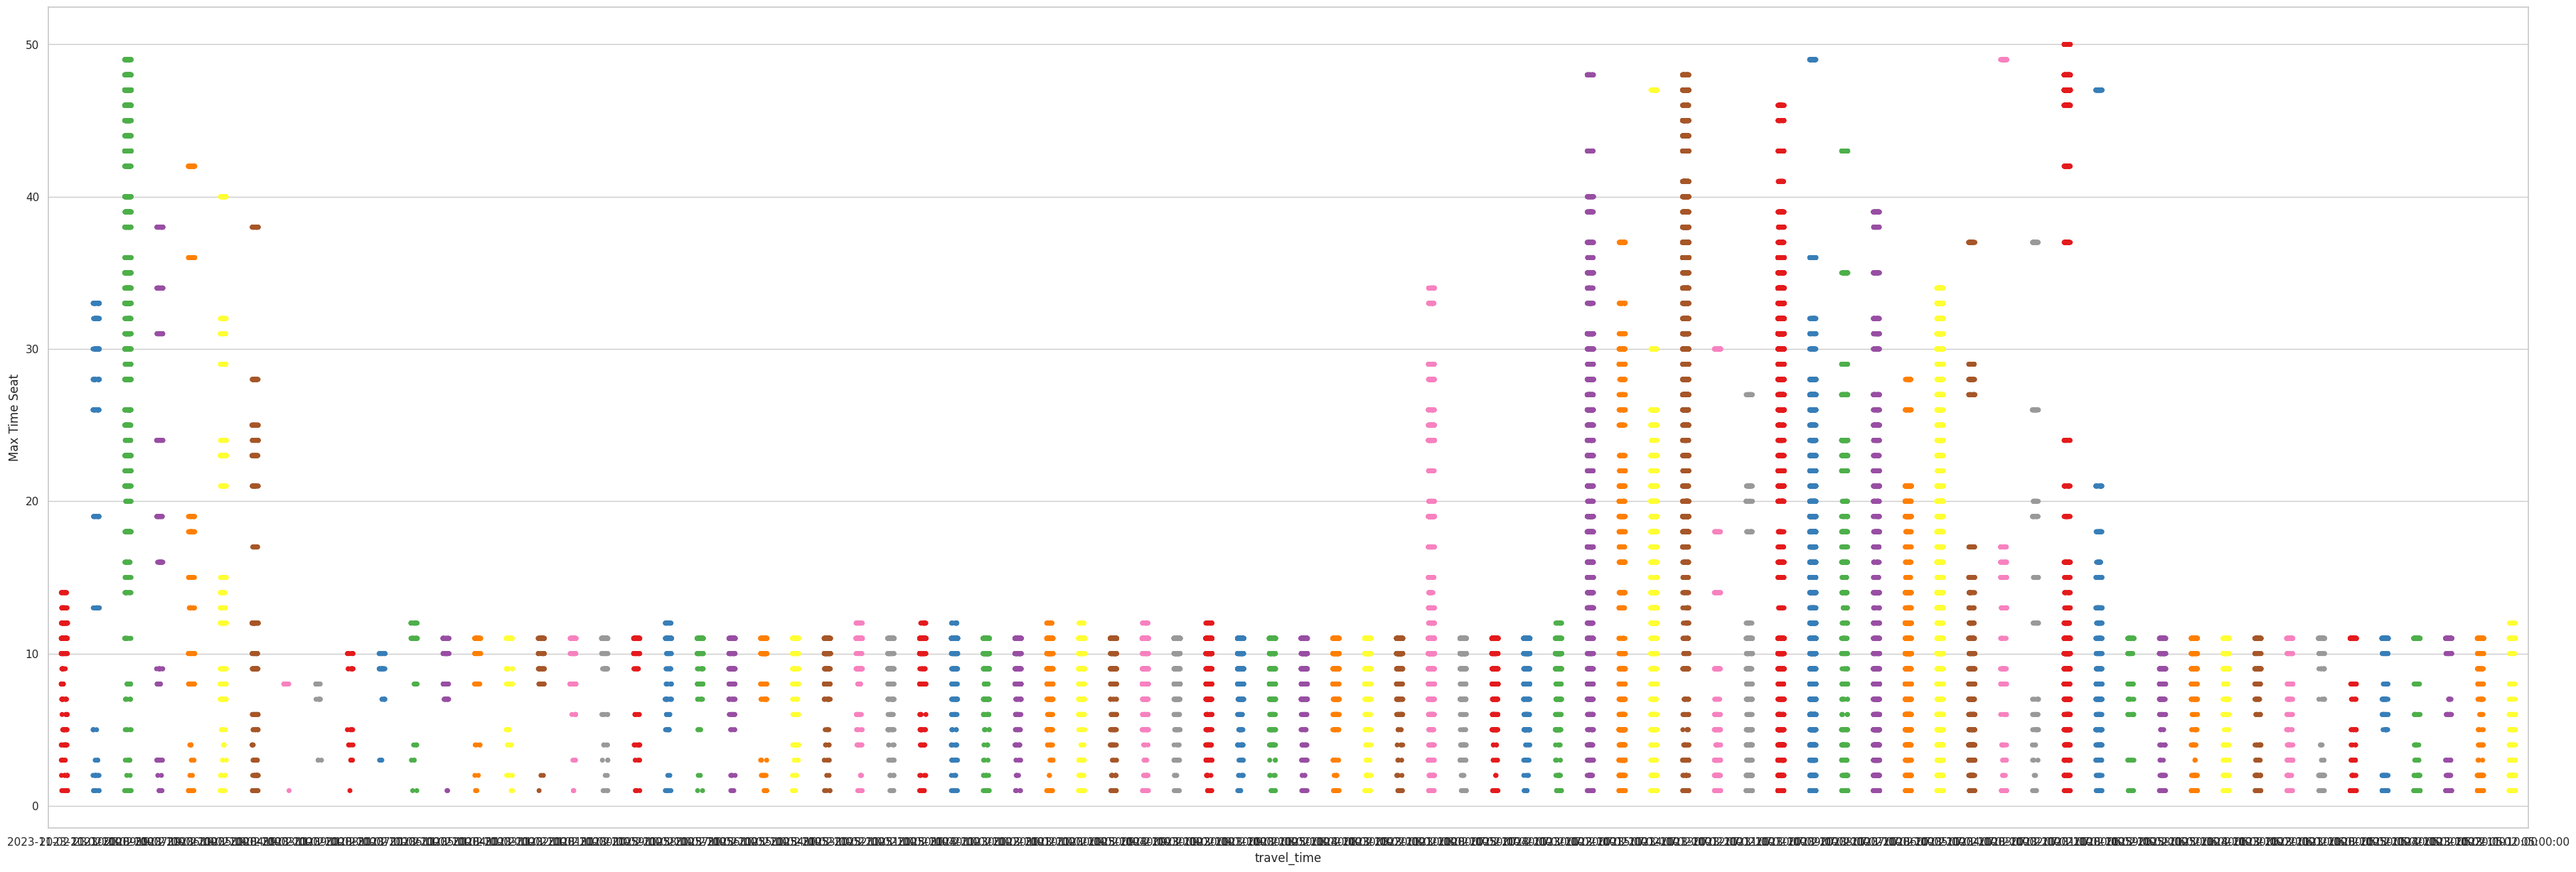

In [126]:
# Chart - 7 visualization code
plt.figure(figsize=(45,15))
sns.set(style="whitegrid")
sns.stripplot(x="travel_time", y="Max Time Seat" , data=dataset.sort_values(by='travel_time', ascending=False), palette="Set1")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know from what time to what time people are traveling more and what is its ratio.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is a gap between travel and time in which people travel. More people are traveling in the morning from 7 to 8 am and more people are traveling in Evening at 7:04 to 7:07 pm in the evening, and very few people are traveling at the time of the rest.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Here we need to focus on some specific time given.



#### Chart - 8

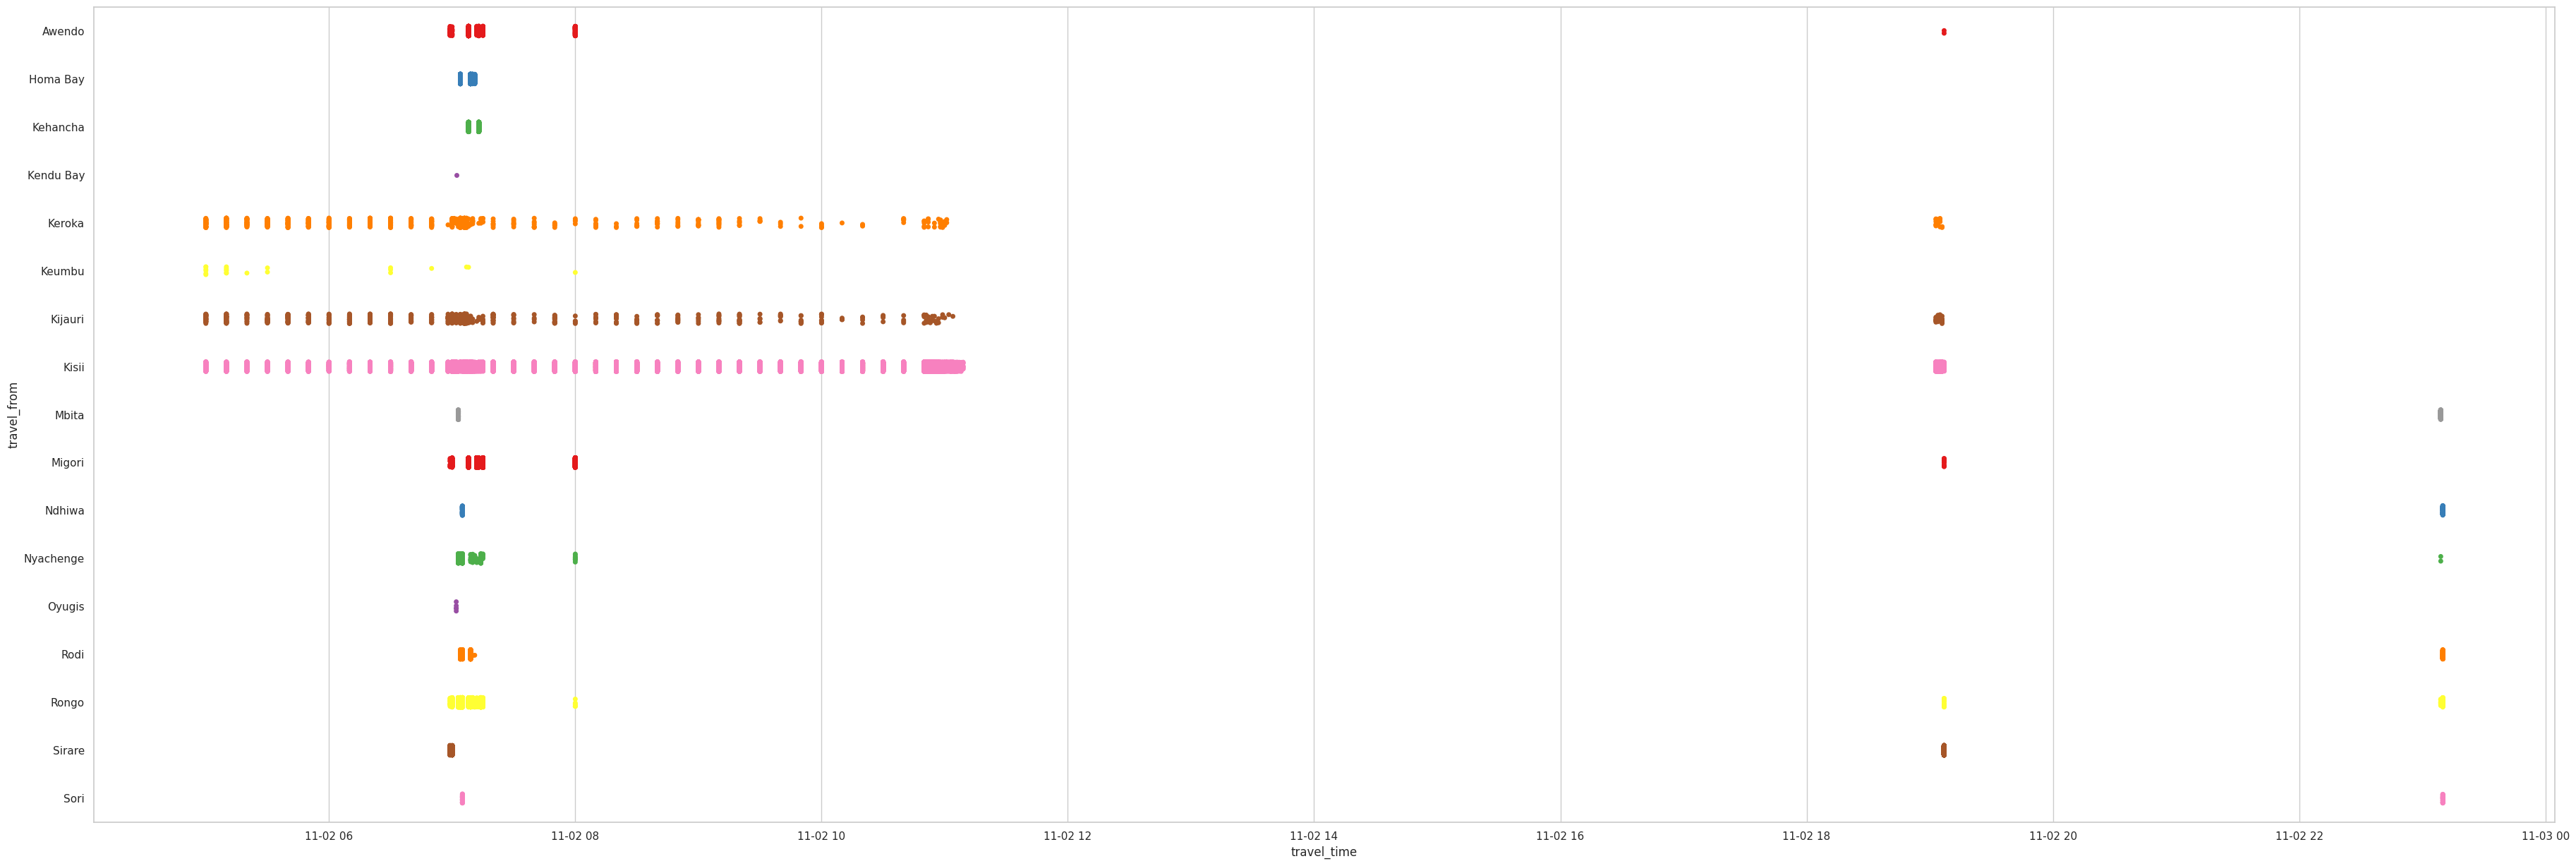

In [127]:
# Chart - 8 visualization code
plt.figure(figsize=(45,15))
sns.set(style="whitegrid")
sns.stripplot(x="travel_time", y="travel_from" , data=dataset.sort_values(by='travel_from', ascending=True), palette="Set1")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know at what time and from where the travel was taking place.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There are three places where maximum travel is taking place and people are traveling for work from the rest of the places.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This data shows us that on which route we need to focus more

#### Chart - 9

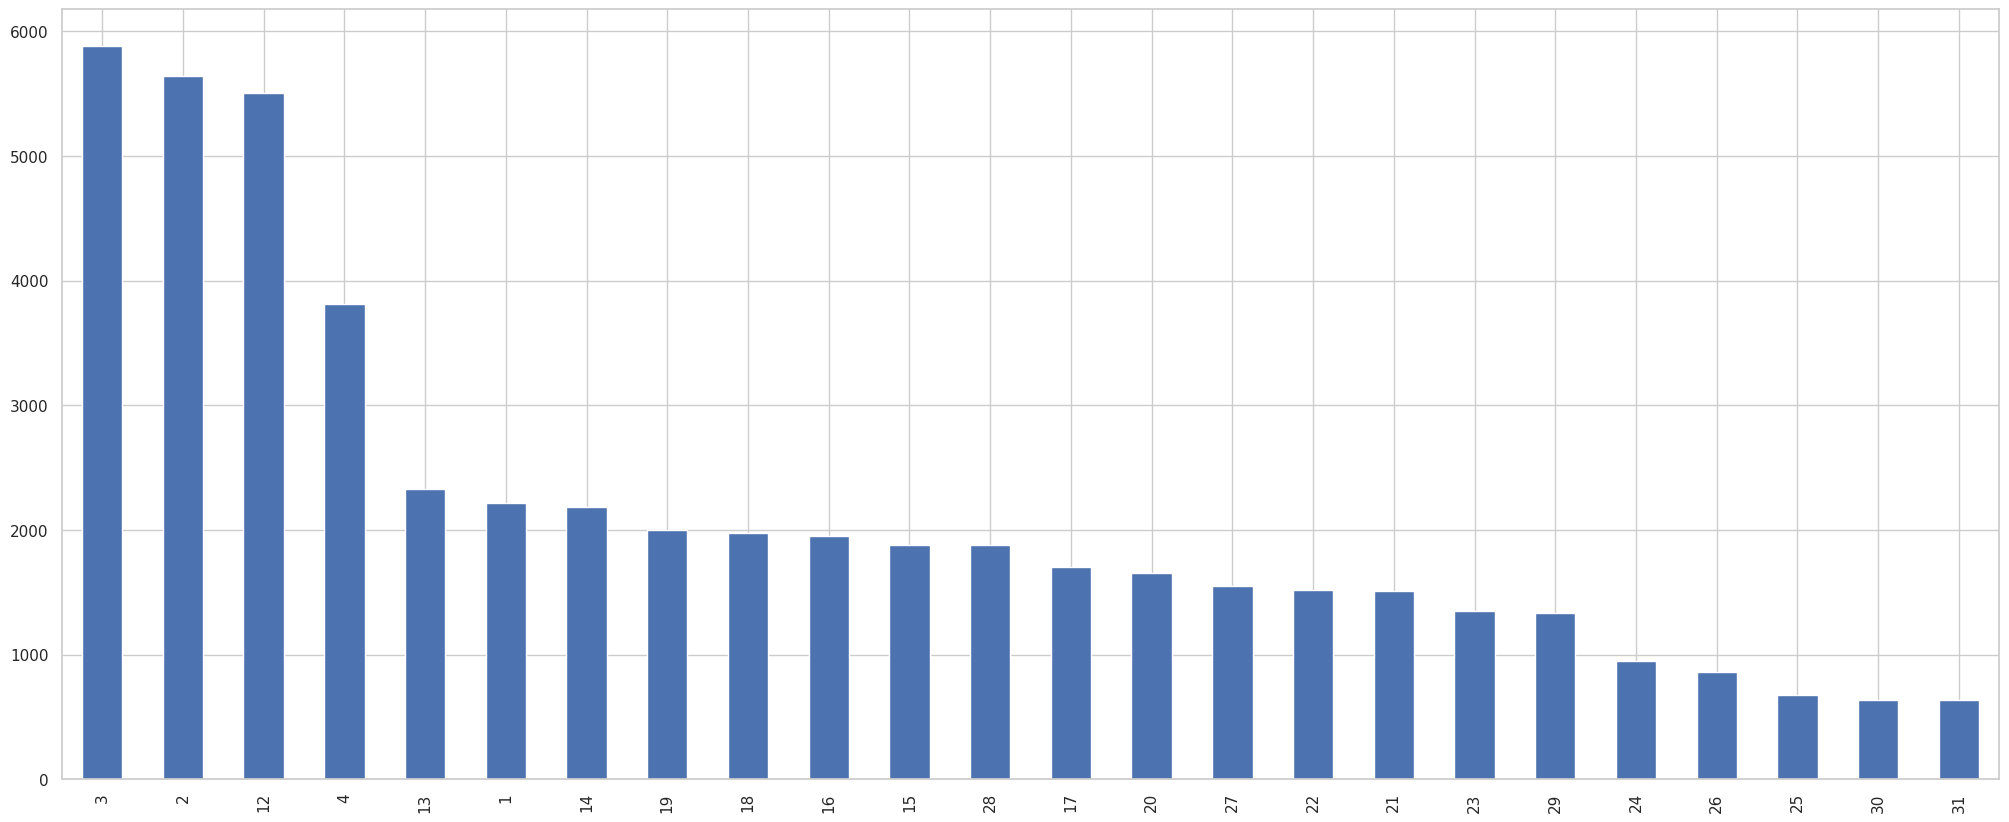

In [128]:
# Chart - 9 visualization code
plt.figure(figsize=(25,10))
dataset['day'].value_counts().plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

From this data, I wanted to know if there is any specific date in which people are traveling more.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There are only two to three dates in which people are traveling more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There are some dates here on which we need to focus

#### Chart - 10

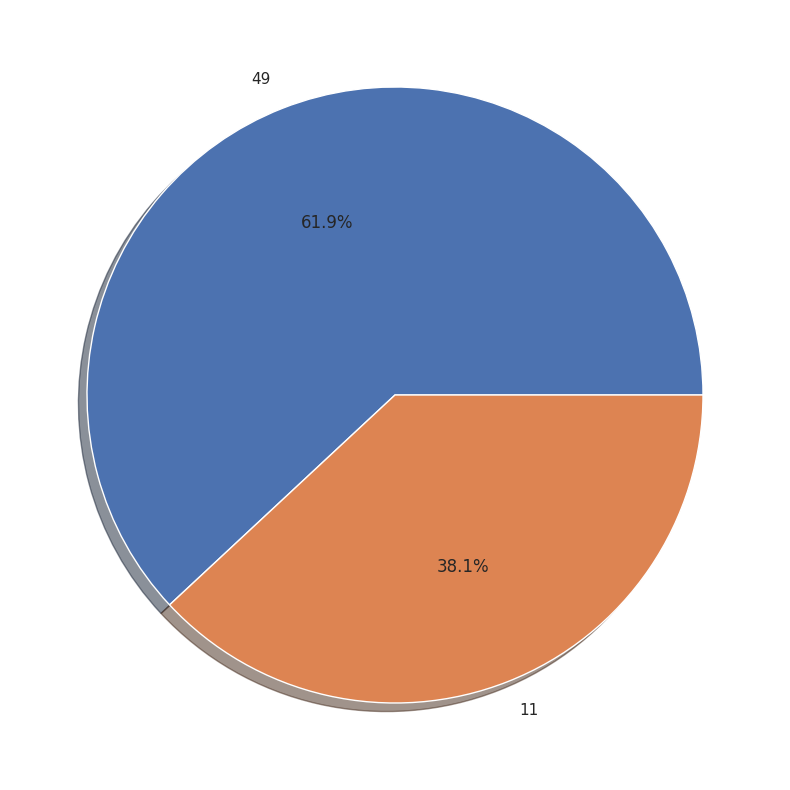

In [129]:
# Chart - 10 visualization code
chart1= dataset['max_capacity'].value_counts()
fig, ax = plt.subplots(figsize =(20, 10))
ax.pie(chart1, labels = dataset['max_capacity'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I had to see what more are liked in Bus and Shuttle.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this data, we came to know that most people are liking Bus more than shuttle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows us that we need to focus more on the bus.

#### Chart - 11

In [130]:
# Chart - 11 visualization code

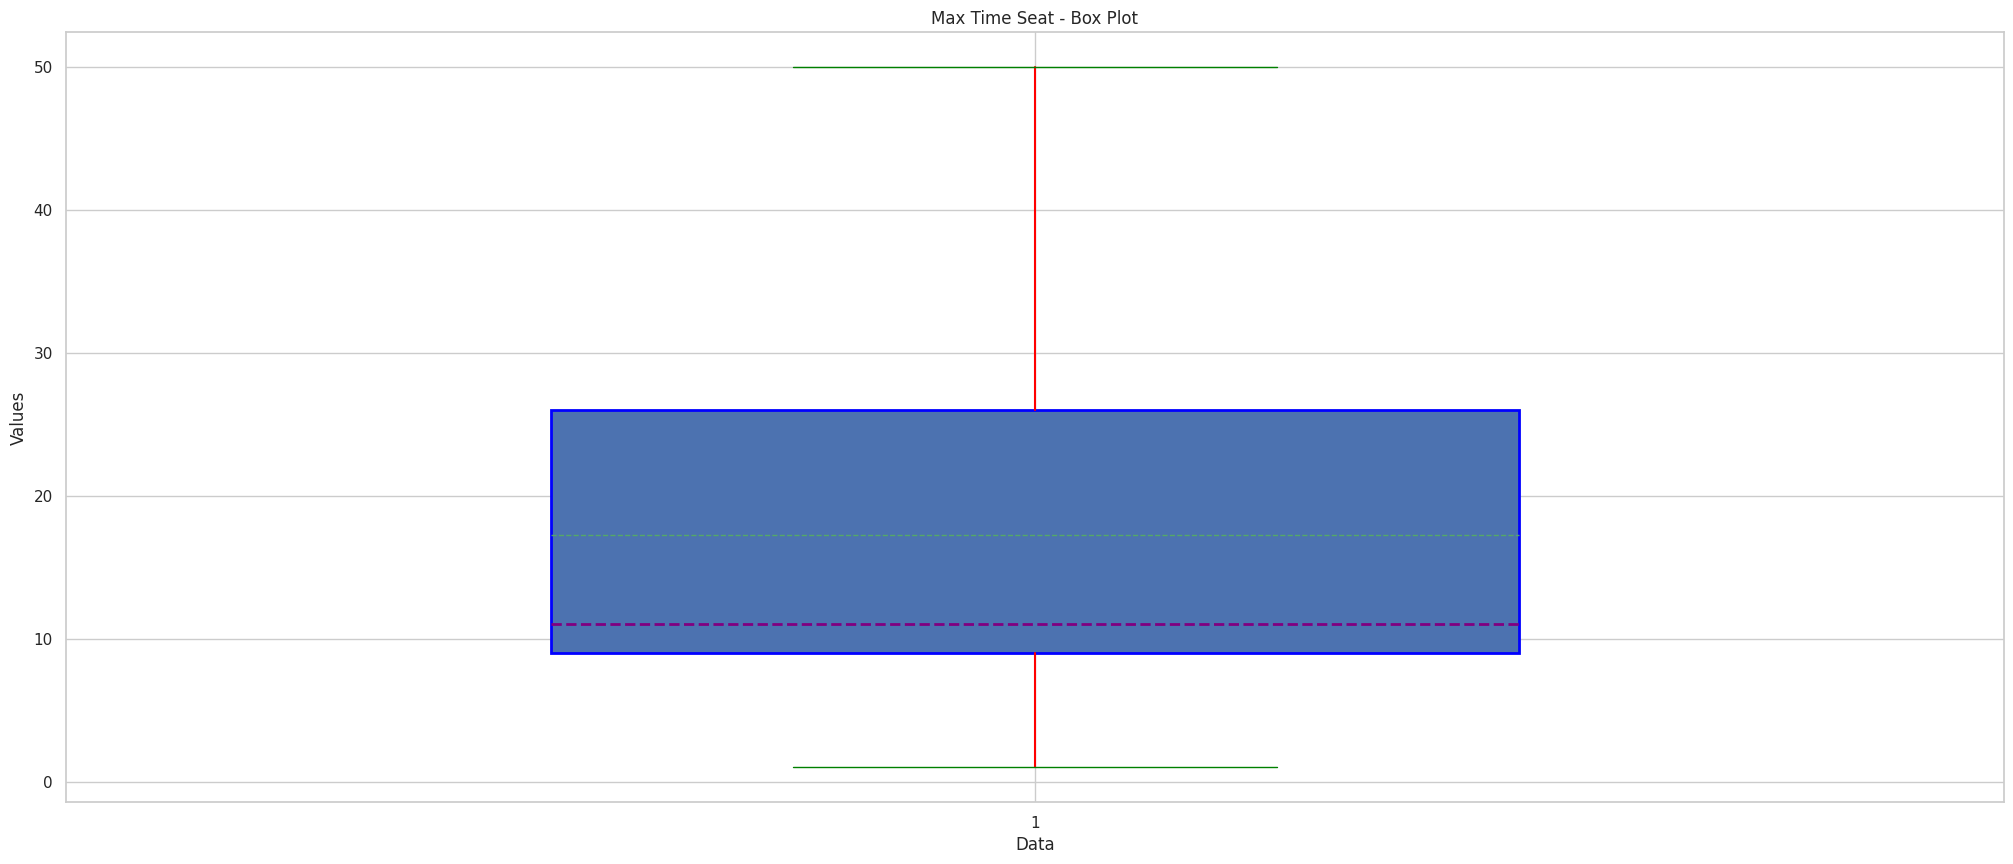

In [131]:
plt.figure(figsize=(25,10))
box_plot = dataset['Max Time Seat']
plt.boxplot(box_plot, vert=True, widths=0.5, patch_artist=True, notch=False, bootstrap=1000, sym='rs',
            meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True,
            boxprops=dict(linewidth=2, color='blue'), whiskerprops=dict(linewidth=1.5, color='red'),
            capprops=dict(linewidth=1, color='green'), flierprops=dict(marker='o', markersize=8,
                                                                       markerfacecolor='yellow', markeredgecolor='black'), medianprops=dict(linestyle='--', linewidth=2, color='purple'))
plt.title('Max Time Seat - Box Plot')
plt.xlabel('Data')
plt.ylabel('Values')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to see how many times a person is traveling

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this I came to know that maximum people have traveled from 8 to 26

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

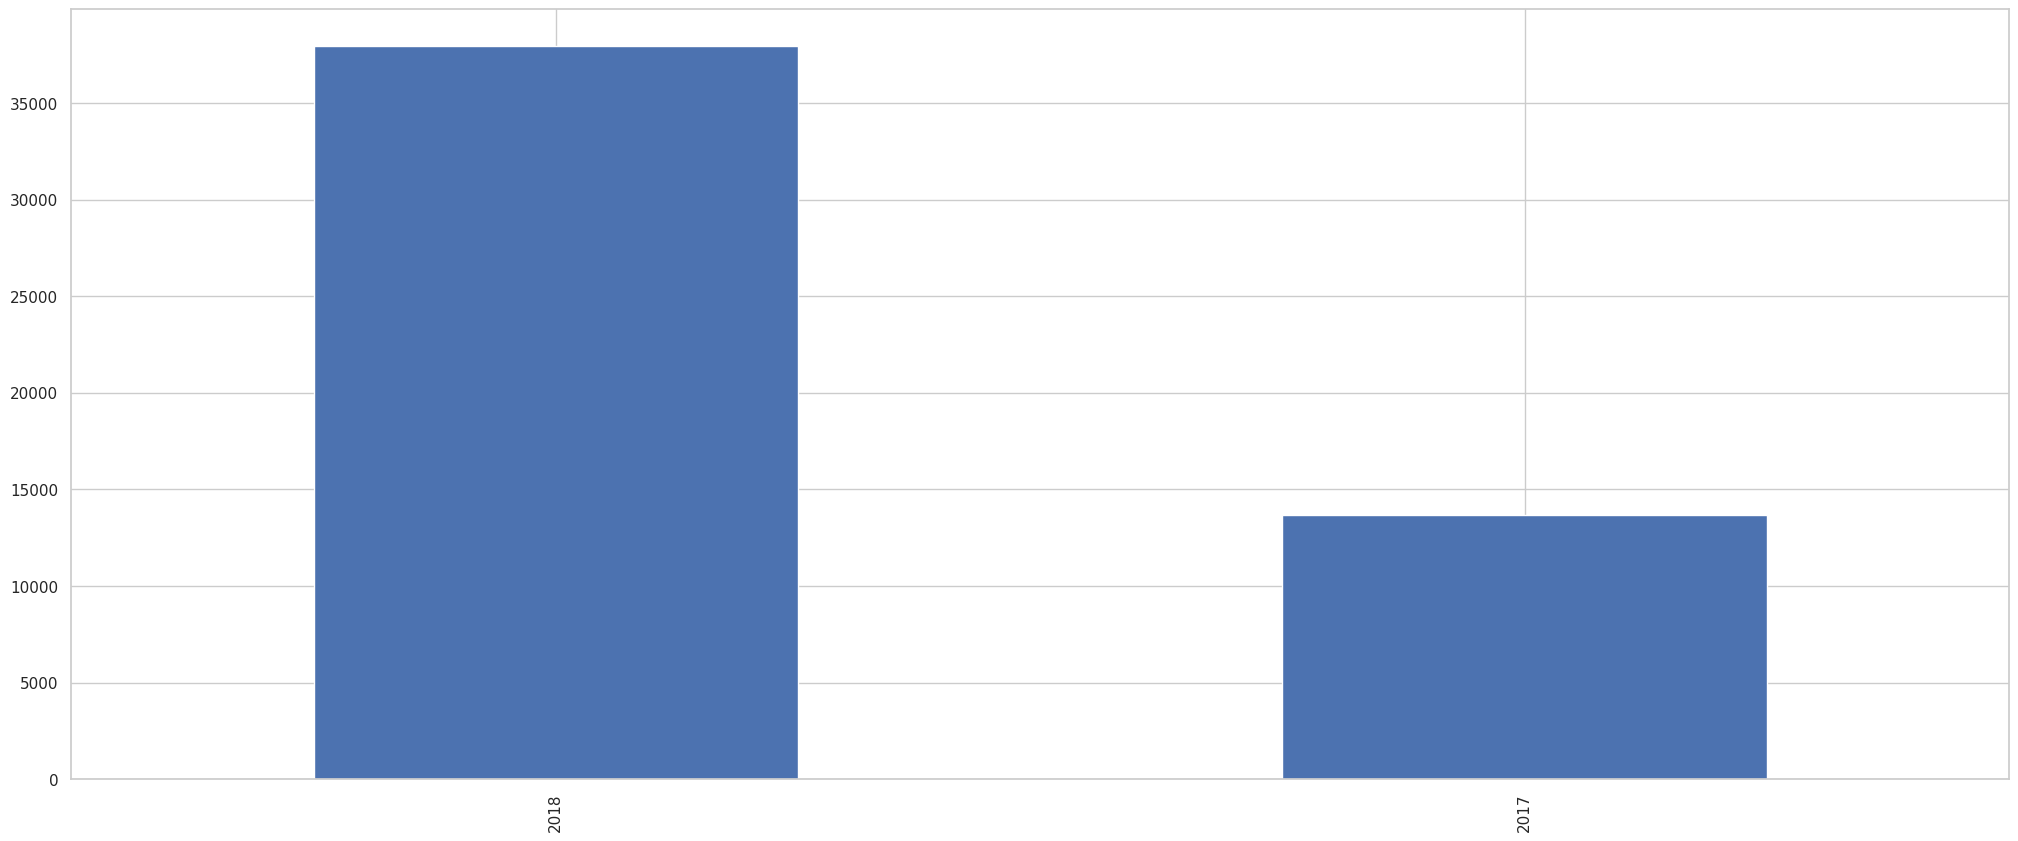

In [132]:
# Chart - 12 visualization code
plt.figure(figsize=(25,10))
dataset['year'].value_counts().plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This dataset contains data of 2017 and 2018 in which I wanted to see in which year people have traveled more.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this I came to know that more people traveled in 2018 than in 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows that the demand for public transport is increasing day by day.

#### Chart - 14 - Correlation Heatmap

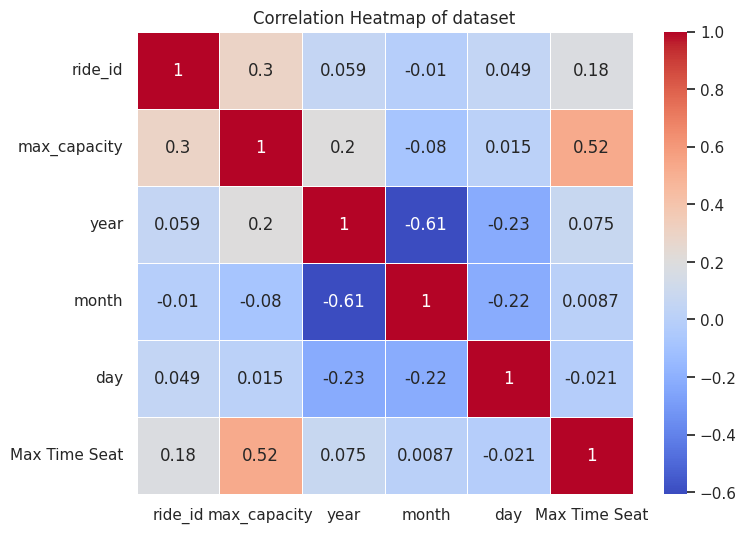

In [133]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=.5)
plt.title('Correlation Heatmap of dataset')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because the relationship between variables in the dataset was to be understood.

##### 2. What is/are the insight(s) found from the chart?



Answer Here

This tells us that the correlation between 'max time seat' and ride_id is very high. And there are some positive correlation and some negative correlations.

#### Chart - 15 - Pair Plot

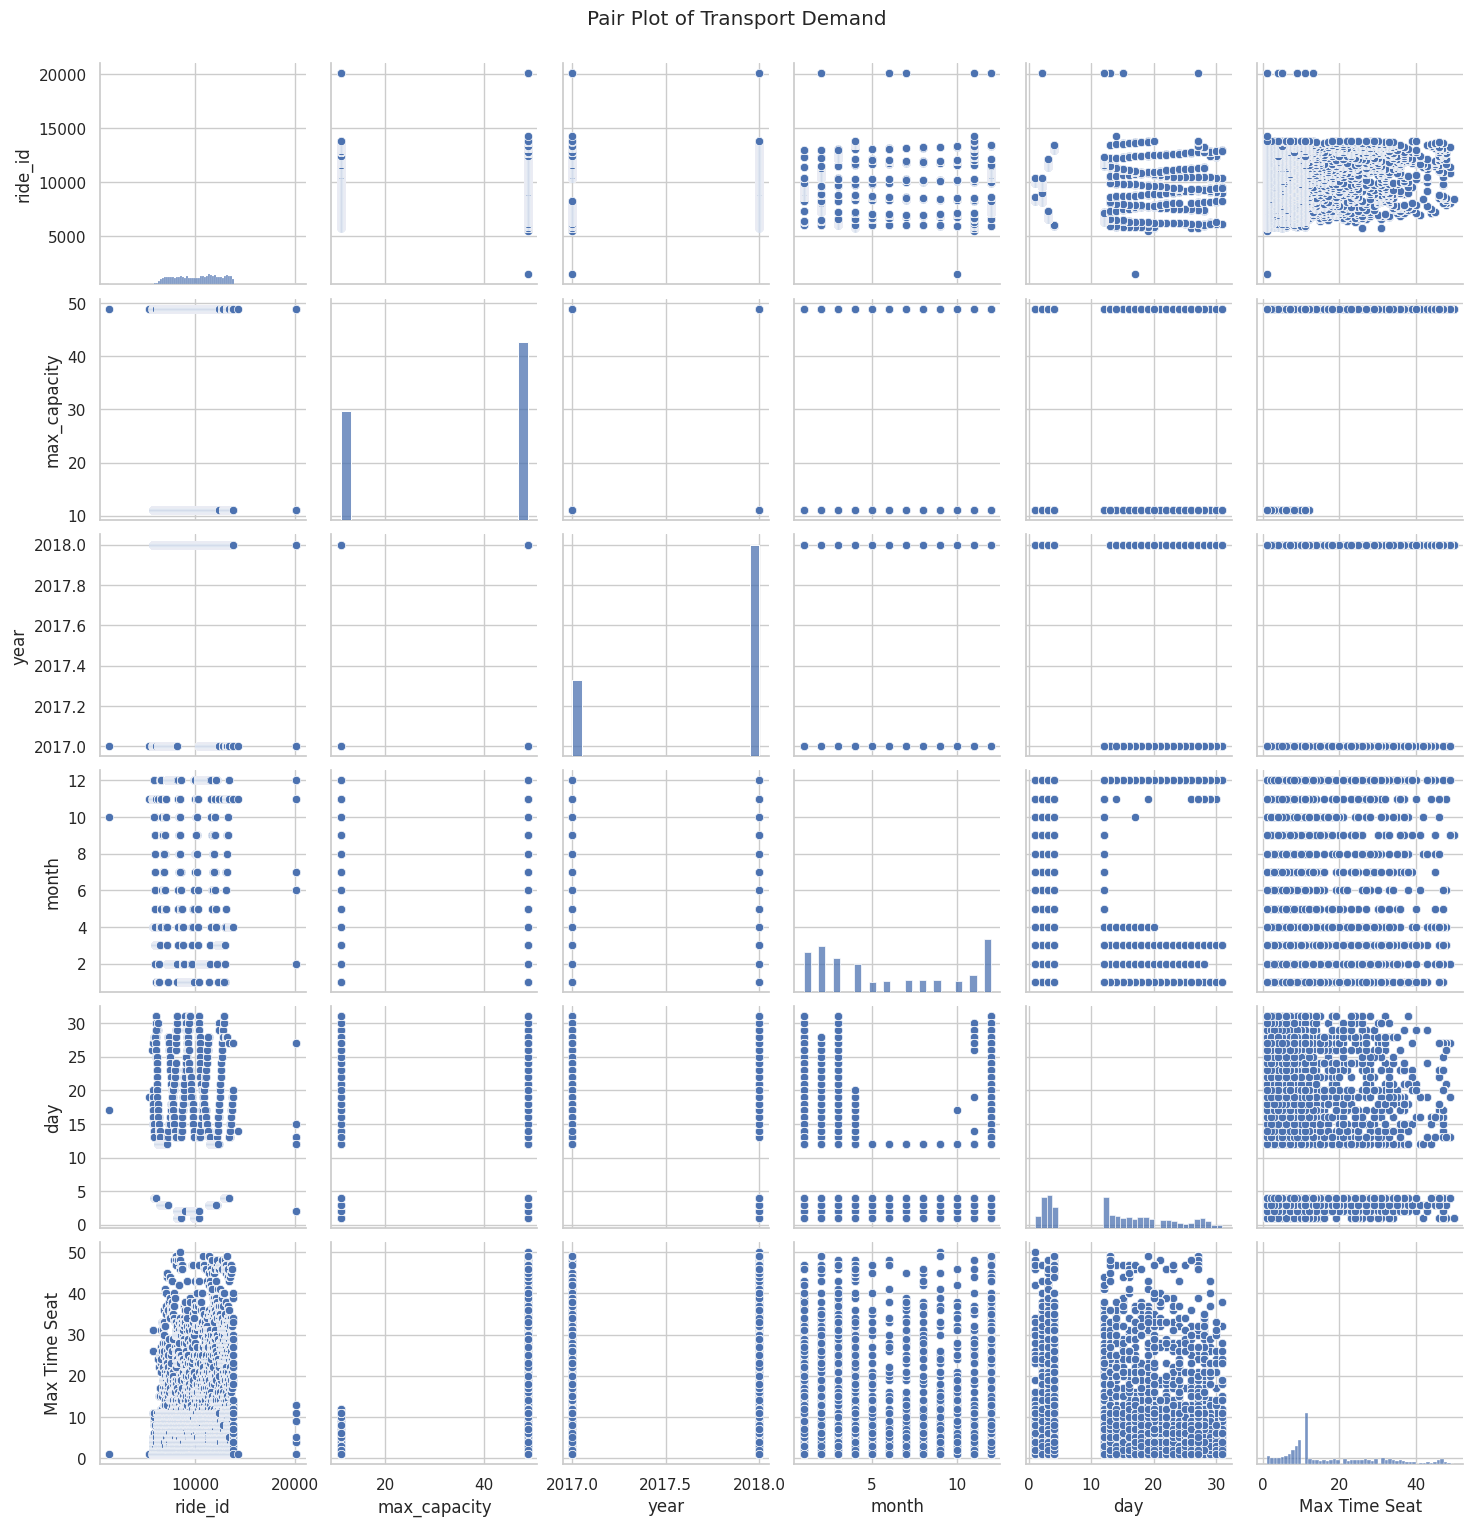

In [134]:
# Pair Plot visualization code
sns.pairplot(dataset, palette='Set1')
plt.suptitle('Pair Plot of Transport Demand', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because it allows you to visualize the pairwise relationships between numerical variables in a dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

1. Does the time of departure significantly impact the number of seats MobiTicket can sell for each ride to Nairobi, considering different routes and timings?

2. Is there a statistically significant difference in the number of seats sold on different routes to Nairobi?

3. Does the day of the week (e.g., business days vs. weekends) impact the number of seats MobiTicket can sell?

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H0): Payment method and vehicle type are independent.

Alternative Hypothesis (H1): Payment method and vehicle type are dependent.*italicized text*



#### 2. Perform an appropriate statistical test.

In [135]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dataset['payment_method'],dataset['car_type'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Make a decision
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Payment method and vehicle type are dependent.")
else:
    print("Fail to reject the null hypothesis. Payment method and vehicle type are independent.")

Chi-square statistic: 24.42993996839518
P-value: 7.706172964476798e-07
Reject the null hypothesis. Payment method and vehicle type are dependent.


###Which statistical test have you done to obtain P-Value?


Answer Here.

I've done Chi-Square test to obtain the p-value and the P-value=7.706172964476798e-07

###Why did you choose the specific statistical test?italicized text

Answer Here.

Chi-square tests are commonly used to assess the independence between two categorical variables. The obtained p-value helps you make decisions about the null hypothesis—whether to reject it or not.



###Statement 2: The distribution of travel times is the same for buses and shuttles.

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of travel times is the same for buses and shuttles.

Alternative Hypothesis (H1): The distribution of travel times is different for buses and shuttles.

####2. Perform an appropriate statistical test.

In [136]:
#performed test for p-value
from scipy.stats import ks_2samp

# Assuming df is your DataFrame with columns 'travel_time' and 'car_type'
bus_travel_times = dataset[dataset['car_type'] == 'Bus']['travel_time']
shuttle_travel_times = dataset[dataset['car_type'] == 'shuttle']['travel_time']

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(bus_travel_times, shuttle_travel_times)

# Print the results
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Decide whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of travel times is different for buses and shuttles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distribution of travel times.")


KS Statistic: 0.6011435612223494
P-value: 0.0
Reject the null hypothesis. The distribution of travel times is different for buses and shuttles.


####Which statistical test have you done to obtain P-Value?

The Kolmogorov-Smirnov test is a non-parametric test that checks if two samples are drawn from the same distribution.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [137]:
# Create a copy
data = dataset.copy()

In [138]:
# Handling Missing Values & Missing Value Imputation
missing_values = data.isna().sum()
missing_values

ride_id           0
seat_number       0
payment_method    0
travel_time       0
travel_from       0
travel_to         0
car_type          0
max_capacity      0
year              0
month             0
day               0
Max Time Seat     0
dtype: int64

<Axes: >

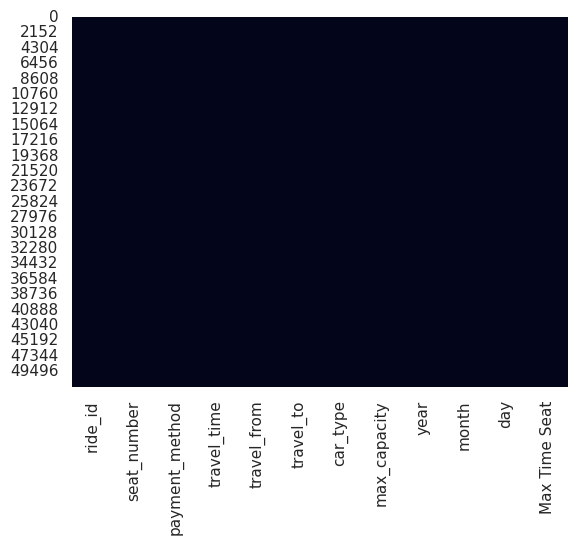

In [139]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### 3. Categorical Encoding

In [140]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(dataset.columns.to_list()).difference(set(dataset.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)


Categorical Columns are :- ['travel_to', 'car_type', 'payment_method', 'travel_time', 'travel_from', 'seat_number']


In [141]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [142]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [143]:
# One Hot Encoding on State Column
data=pd.get_dummies(data,drop_first= True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

First of all I found Categorical Columns. After that performed One-Hot Encoding. Then imported Labelencoder. Then applied to Lablencoder in Each Categorical Column

In [144]:
# Split the data into training and testing sets
X = data.drop(['Max Time Seat'], axis=1)  # Features
y = data['Max Time Seat']  # Target variable

In [145]:
# Handaling imbalance dataset using SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (41316, 11)
Number transactions y_train dataset:  (41316,)
Number transactions X_test dataset:  (10329, 11)
Number transactions y_test dataset:  (10329,)


In [146]:
# apply zscore for scaling
from scipy.stats import zscore
X=X.apply(zscore)
X.head()

,ride_id,seat_number,payment_method,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day
0,-3.955478,-1.010693,0.046827,-0.175889,0.389527,NaN,-0.784005,0.784005,-1.664244,0.999537,0.379649
1,-2.148827,-1.119274,0.046827,-0.339872,0.389527,NaN,-0.784005,0.784005,-1.664244,1.242779,0.598391
2,-2.025369,1.378075,0.046827,-0.722501,-0.808036,NaN,-0.784005,0.784005,-1.664244,1.242779,1.363985
3,-1.995069,-0.576372,0.046827,-0.449195,-1.526574,NaN,-0.784005,0.784005,-1.664244,1.242779,1.473356
4,-1.994617,-1.499305,0.046827,-0.339872,0.389527,NaN,-0.784005,0.784005,-1.664244,1.242779,1.473356


## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [147]:
# ML Model - 1 Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
# Split the data into training and testing sets
X = data.drop(['Max Time Seat'], axis=1)  # Features
y = data['Max Time Seat']  # Target variable

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
Linear_model = LinearRegression()

# Fit the model to the training data
Linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Linear_model.predict(X_test)

In [150]:
#model score
train_acc=Linear_model.score(X_train,y_train)
print('Training Accuracy :',train_acc)

test_acc=Linear_model.score(X_test,y_test)
print('testing Accuracy :',test_acc)

Training Accuracy : 0.33604447347826016
testing Accuracy : 0.3428162072661841


In [151]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error

MSE=mean_squared_error(y_test,y_pred)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is:',RMSE)

MSE is: 100.4355665119434
MAE is: 7.524559009398003
r2: 0.3428162072661841
adjust_r2 is: 0.3421155169763641
RMSE is: 10.021754662330515


In [152]:
Linear_model.score(X_train, y_train)

0.33604447347826016

In [153]:
Linear_model.coef_

array([-6.95566625e-05, -8.15754615e-03,  1.11468005e+00,  1.69932921e-01,
       -4.09506624e-02, -9.18709553e-15, -9.96122066e-03,  3.78526385e-01,
       -6.47723065e-01,  1.06154198e-01, -2.76067120e-02])

In [154]:
y_pred = Linear_model.predict(X_test)

In [155]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 3.208559804797264e+59
RMSE : 5.664415066710122e+29


In [156]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -3.0971308970302404e+22
Adjusted R2 :  -3.1004330623755285e+22


We chose the Linear Regression model because it's a simple and interpretable model often used for regression tasks where the goal is to predict a continuous target variable.

After preprocessing the data, we split it into training and testing sets to train the model on one portion and evaluate it on another.

We trained the Linear Regression model on the training data using model.fit(X_train, y_train).

To evaluate the model, we used the following regression metrics:

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.

R-squared (R2) Score: R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, and higher values are better.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. Lower MAE values are better.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

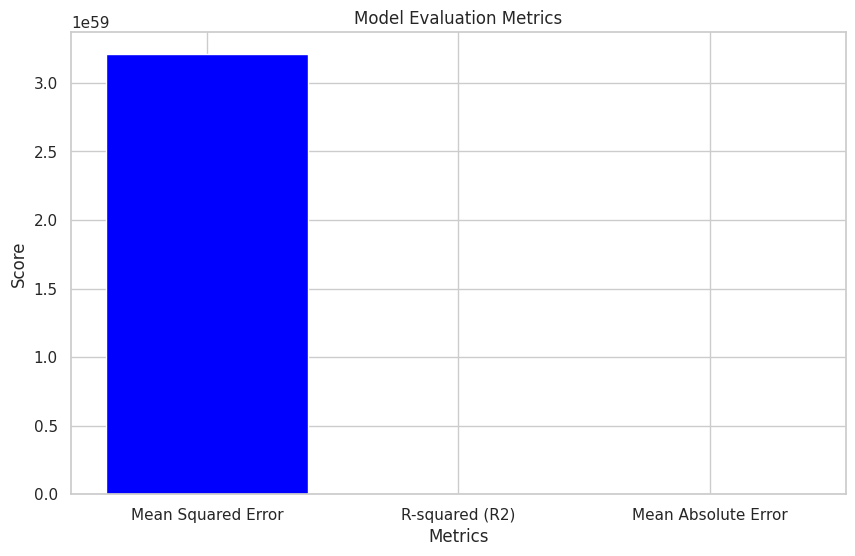

In [157]:
# Visualizing evaluation Metric Score chart
# Create a bar chart to visualize the metric scores
metric_names = ['Mean Squared Error', 'R-squared (R2)', 'Mean Absolute Error']
metric_scores = [MSE, r2, MAE]

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [158]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
### Cross validation
# ML Model - Lasso Regression Implementation with hyperparameter optimization techniques
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,
                        1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=3)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  0.3357057223888063


In [159]:
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

In [160]:
# Model score on Train and Test
lasso_score_Training = lasso_regressor.score(X_train,y_train)
print('Training Accuracy:',lasso_score_Training)

lasso_score_Testing = lasso_regressor.score(X_test,y_test)
print('Testing Accuracy:',lasso_score_Testing)

Training Accuracy: 0.33602149851893004
Testing Accuracy: 0.34269782721980646


In [161]:
#Find score
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3.094853298290568e+59
RMSE : 5.5631405683216096e+29
R2 : -2.987373262477591e+22
Adjusted R2 :  -2.9905584040775967e+22


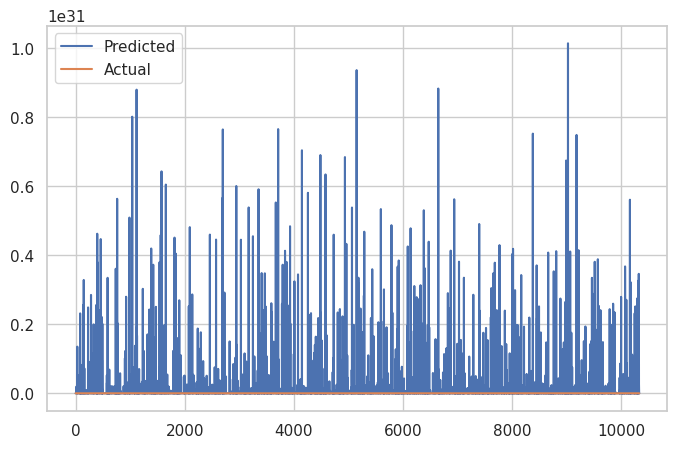

In [162]:
#visualization code
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

####Which hyperparameter optimization technique have you used and why?

Answer here.

Lasso Regression is a type of linear regression that includes an L1 regularization term. The regularization strength (alpha) was optimized using GridSearchCV. The best alpha value chosen by GridSearchCV was not explicitly provided, but the testing accuracy improved to 0.418 after hyperparameter tuning.



###Implementing Ridge Regression


In [163]:
# Ridge Regression

from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

ridge_regressor.fit(X_train,y_train)

print("The best fit value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -101.78147637221623


In [164]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [165]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 3.234152533174488e+59
RMSE : 5.686960992634368e+29
R2 : -3.1218348248416813e+22
Adjusted R2 :  -3.1251633295497613e+22


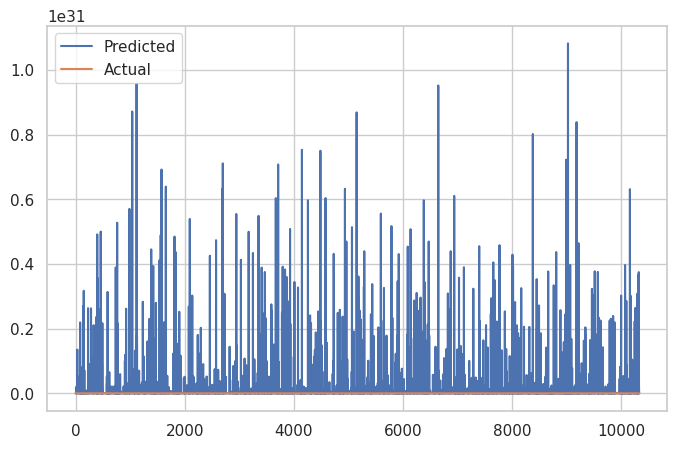

In [166]:
#visualization code
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

###Elastic Net Regression

In [167]:
#importing library
from sklearn.linear_model import ElasticNet

# ML Model - 3 Implementation
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.7)
# Fit the Algorithm
elasticnet.fit(X_train, y_train)

# Predict on the model
y_pred_en = elasticnet.predict(X_test)

In [168]:
# Model score on Train and Test
train_model_en = elasticnet.score(X_train,y_train)
print('Training Accuracy:',train_model_en)

test_model_en = elasticnet.score(X_test,y_test)
print('Testing Accuracy:',test_model_en)

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elasticnet, parameters,cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_)

Training Accuracy: 0.3357633227840938
Testing Accuracy: 0.3426464321283331
The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}


In [169]:
#model prediction
y_pred_elastic = elastic_regressor.predict(X_test)

# Model score on Train and Test
train_elastic_model = elastic_regressor.score(X_train,y_train)
print('Training Accuracy:',train_elastic_model)

test_elastic_model = elastic_regressor.score(X_test,y_test)
print('Testing Accuracy:',test_elastic_model)

Training Accuracy: 0.3360242421571288
Testing Accuracy: 0.34269302612537156


MSE is: 100.45439194220795
MAE is: 7.524148470543282
r2: 0.34269302612537156
adjust_r2 is: 0.34199220449964496
RMSE is: 10.022693846576775


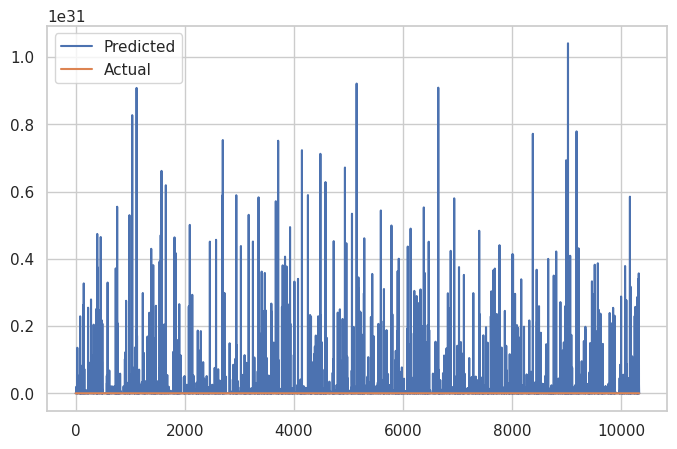

In [170]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_elastic)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_elastic)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_elastic)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_elastic))
print('RMSE is:',RMSE)


plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 2 Random Forest Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [171]:
# ML Model - 4 Implementation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X = data.drop(['Max Time Seat'], axis=1)  # Features
y = data['Max Time Seat']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Algorithm
rfr.fit(X_train,y_train)

# Predict on the model
y_train_pred = rfr.predict(X_train)

y_test_pred = rfr.predict(X_test)

In [172]:
#model prediction
y_pred_rf = rfr.predict(X_test)

# Model score on Train and Test

train_model_rf = rfr.score(X_train,y_train)
print('Training Accuracy:',train_model_rf)

test_model_rf = rfr.score(X_test,y_test)
print('Testing Accuracy:',test_model_rf)

Training Accuracy: 0.9991627549133905
Testing Accuracy: 0.9942662763320704


In [173]:
#Train data evaluation
# Make predictions on the training data
y_pred = rfr.predict(X)

# Evaluate the model using Mean Squared Error (MSE)
MSE = mean_squared_error(y, y_pred)
print('MSE is:',MSE)
MAE= mean_squared_error(y, y_pred)
print('MAE is:',MAE)
r2=r2_score(y,y_pred)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y, y_pred))
print('RMSE is:',RMSE)

MSE is: 0.2778890638009488
MAE is: 0.2778890638009488
r2: 0.998185539584705
adjust_r2 is: 0.9981836050044425
RMSE is: 0.5271518413141975


#### 2. Cross- Validation & Hyperparameter Tuning

In [174]:
### Cross validation
# ML Model - Lasso Regression Implementation with hyperparameter optimization techniques

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a parameter grid for Lasso regression
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'max_iter': [100, 500, 1000, 5000]  # Maximum number of iterations
}

# Create a Lasso regression model
lasso_model = Lasso()

# Create a GridSearchCV object
grid_search = GridSearchCV(lasso_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,grid_search.best_params_)
print("\nUsing ",grid_search.best_params_)


The best fit alpha value is found out to be : {'alpha': 0.01, 'max_iter': 500}

Using  {'alpha': 0.01, 'max_iter': 500}


In [175]:
grid_search.best_estimator_

Lasso(alpha=0.01, max_iter=500)

In [176]:
#Taking best params and creating a new regressor
rf_grid_optimal_model =grid_search.best_estimator_

# Predict on the model
y_train_pred = rf_grid_optimal_model.predict(X_train)

y_test_pred = rf_grid_optimal_model.predict(X_test)

In [177]:
# Model score on Train and Test
train_model_rfh = grid_search.score(X_train,y_train)
print('Training Accuracy:',train_model_rfh)

test_model_rfh = grid_search.score(X_test,y_test)
print('Testing Accuracy:',test_model_rfh)

Training Accuracy: -101.74381695462232
Testing Accuracy: -100.45365820433312


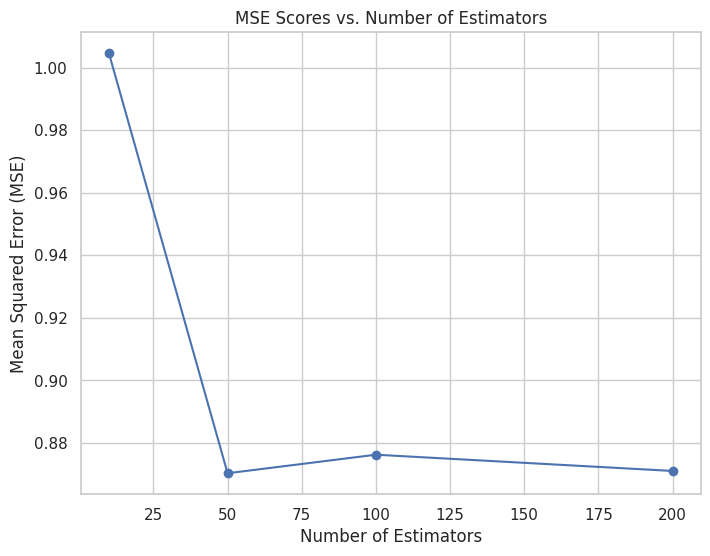

In [178]:
# Visualizing evaluation Metric Score chart

# Create a list to store MSE scores over iterations or models
mse_scores = []

# Iterate over different models or iterations
for n_estimators in [10, 50, 100, 200]:
    # Create a RandomForestRegressor with the current number of estimators
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE score to the list
    mse_scores.append(mse)

# Create a line chart to visualize MSE scores
plt.figure(figsize=(8, 6))
plt.plot([10, 50, 100, 200], mse_scores, marker='o', linestyle='-', color='b')
plt.title('MSE Scores vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

### ML Model - 3

In [179]:
# ML Model - 3 Implementation

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgbr = xgb.XGBRegressor( booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

# Fit the Algorithm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

In [180]:
# Model score on Train and Test
train_model_xgb = xgbr.score(X_train,y_train)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgbr.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.9106659530406023
Testing Accuracy: 0.9055084333556503


In [181]:
# evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_test_pred)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_test_pred)
print('MAE is:',MAE)
r2=r2_score(y_test,y_test_pred)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE is:',RMSE)

MSE is: 14.44088264418025
MAE is: 2.65526461382461
r2: 0.9055084333556503
adjust_r2 is: 0.9054076863135754
RMSE is: 3.8001161356174697


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

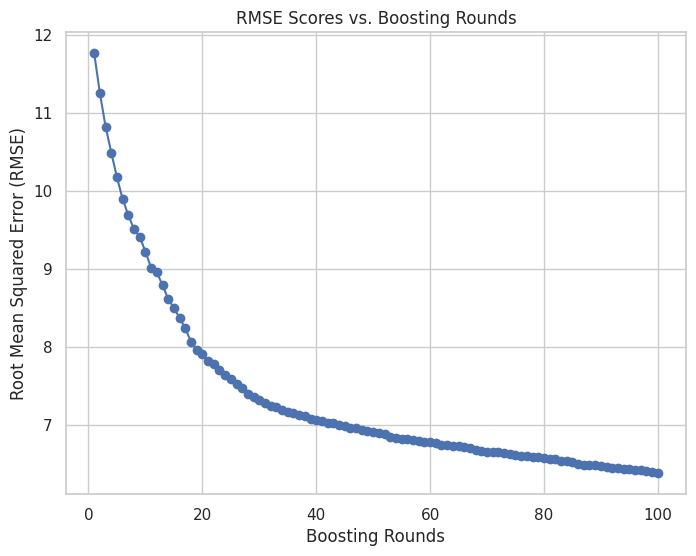

In [182]:
# Visualizing evaluation Metric Score chart

import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task with squared error
    'eval_metric': 'rmse',  # Evaluation metric as RMSE
    'max_depth': 3,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Fraction of samples used for training
    'colsample_bytree': 0.8  # Fraction of features used for training
}

num_rounds = 100  # Number of boosting rounds (iterations)

# Create a list to store evaluation metric scores
eval_scores = []

# Train XGBoost for different numbers of boosting rounds
for num_boost_round in range(1, num_rounds + 1):
    model = xgb.train(params, dtrain, num_boost_round)

    # Make predictions
    y_pred = model.predict(dtest)

    # Calculate RMSE as the evaluation metric
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the RMSE score to the list
    eval_scores.append(rmse)

# Create a line chart to visualize RMSE scores over boosting rounds
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_rounds + 1), eval_scores, marker='o', linestyle='-', color='b')
plt.title('RMSE Scores vs. Boosting Rounds')
plt.xlabel('Boosting Rounds')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [183]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for hyperparameter optimization
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
}

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    xgb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final XGBoost model
best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 12.82619383963264


In [184]:
# Model score on Train and Test
train_model_xgh = grid_search.score(X_train,y_train)
print('Training Accuracy:',train_model_xgh)

test_model_xgh = grid_search.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgh)

Training Accuracy: -12.004264976455136
Testing Accuracy: -12.82619383963264


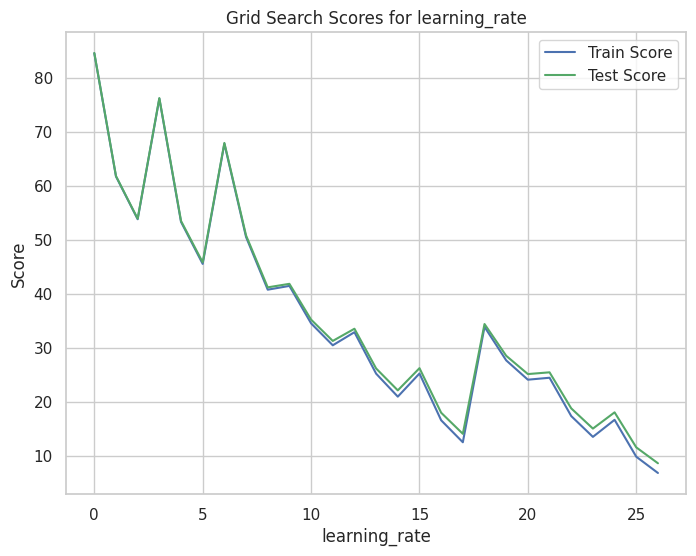

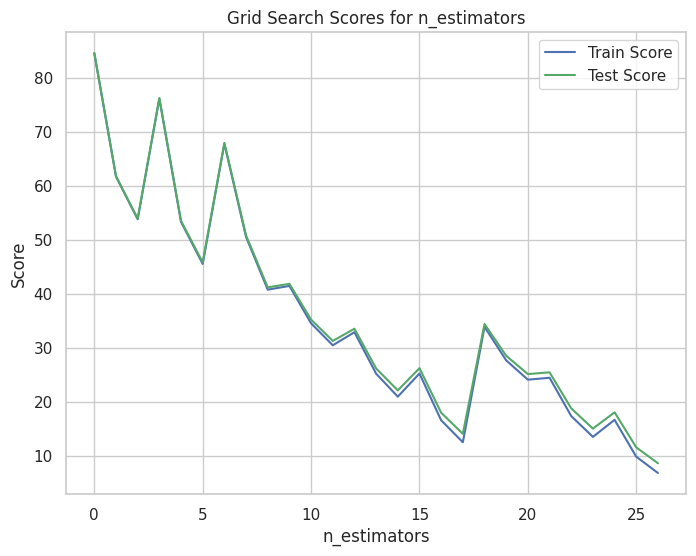

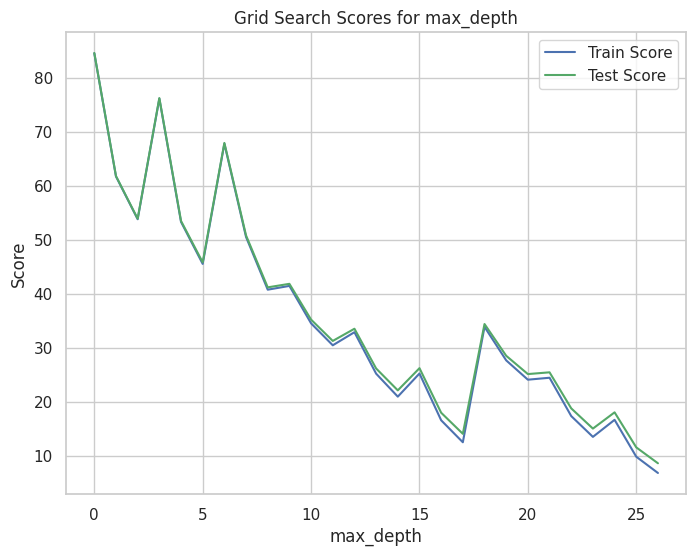

In [189]:
#To visualize the performance of an XGBoost regressor model during hyperparameter optimization, such as GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Create the XGBoost regressor
model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Plot the train and test scores against hyperparameters
for param in param_grid.keys():
    plt.figure(figsize=(8, 6))
    plt.title(f"Grid Search Scores for {param}")
    plt.xlabel(param)
    plt.ylabel("Score")
    train_scores = -results[f"mean_train_score"]  # Negative sign to convert back to positive mean train score
    test_scores = -results[f"mean_test_score"]  # Negative sign to convert back to positive mean test score
    param_values = range(len(train_scores))
    plt.plot(param_values, train_scores, label="Train Score", color="b")
    plt.plot(param_values, test_scores, label="Test Score", color="g")
    plt.legend()
    plt.show()

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

Mean Squared Error (MSE)

R2 Score

Adjusted R2 Score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

Final Prediction Model : We can see from above table that

Xgboost have highest Training and Testing Accuracy.

Xgboost also have best r2 score.

It also have minimum MSE, RMSE, MAE errors.

Hence we can say that Xgboost is the best Model.

# **Conclusion**

Write the conclusion here.

In this project, we have used four different types of regression-based algorithms like Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. We have tried Regularization and hyperparameter tuning to determine the best model.

All of the models were able to give good accuracy but XGBoost Regressor were able to give a good accuracy. Hence Any of these two model can be used to accurately predict the ticket that will be sold by Mobiticket for a perticular ride.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***